<a href="https://colab.research.google.com/github/adithisirpa/sentiment-analysis/blob/main/sentiment_analysis_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using Logistic Regression, Count Vectorizer, Bag of Words

## Imports

In [ ]:
import nltk
import re
import seaborn as sns
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Extraction of dataset

In [ ]:
df = pd.read_csv('Tweets.csv')
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
labels = df.iloc[:,1].values

# Preprocessing the data

In [ ]:
def remove_pattern(input_txt,pattern):  #removes pattern in input text
  r = re.findall(pattern,input_txt)
  for word in r:
    input_txt = re.sub(word,"",input_txt)
  return input_txt

In [ ]:
#remove twitter handles
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'],"@[\w]*")

#remove special characters, numbers, punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

#remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


# Tokenize i.e to get it into individual words

In [ ]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: clean_tweet, dtype: object

# Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

In [ ]:
#combine words into single sentence

for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didn today Must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really thing about


# Exploratory Data Analysis

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


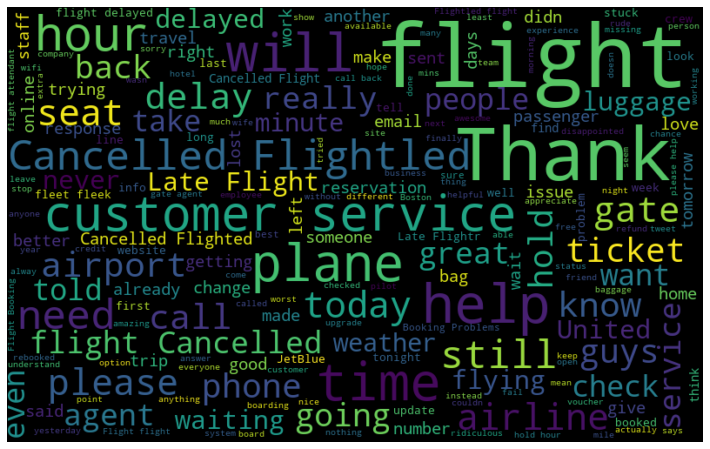

In [ ]:
#frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#plot the graph
plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Feature Extraction

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000, min_df = 2, max_df = 0.90, stop_words=stopwords.words('english'))

processed_features = vectorizer.fit_transform(df['clean_tweet'])

# Split the input for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(processed_features, labels, test_size = 0.25,random_state=42)

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [ ]:
#training
model = LogisticRegression()
model.fit(x_train,y_train)

In [73]:
#testing

predictions = model.predict(x_test)
accuracy_score(y_test,predictions)

0.7781420765027323

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[2151  132   57]
 [ 344  345   49]
 [ 154   76  352]]
              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      2340
     neutral       0.62      0.47      0.53       738
    positive       0.77      0.60      0.68       582

    accuracy                           0.78      3660
   macro avg       0.73      0.66      0.69      3660
weighted avg       0.77      0.78      0.77      3660

0.7781420765027323
